### Chapter 6

# 활성화 함수(Activation Function)

> ## 학습 목표

-  **활성화 함수의 기본 개념과 신경망에서의 역할(비선형성 도입의 중요성)을 이해**하고, 활성화 함수가 모델의 출력에 미치는 영향에 따라 적용할 수 있다.
    
-  **ReLU(Rectified Linear Unit) 활성화 함수**의 정의, 장점, 단점을 이해하고, 파이토치를 사용하여 이를 신경망에 적용할 수 있다.
    
-  **Sigmoid 활성화 함수**의 정의와 주로 사용되는 경우(이진 분류)를 이해하고, 파이토치에서 이를 신경망에 적용할 수 있다.
    
-   **기타 활성화 함수 비교** : Leaky ReLU, Tanh, Softmax 등 다른 활성화 함수의 정의와 활용 사례를 이해하고, 각 함수의 특징에 따라 적용할 수 있다.
    
-   **활성화 함수의 선택 및 영향 분석** : 다양한 활성화 함수의 선택이 신경망의 성능에 미치는 영향을 평가하고, 특정 문제에 적합한 활성화 함수를 선택하는 기준을 이해하고 적용할 수 있다.

## **`렐루 함수와 시그모이드 함수 정의`**

**렐루 함수와 시그모이드 함수는 인공 신경망에서 자주 사용되는 활성화 함수로, 각각 고유한 특징과 사용 목적을 가지고 있습니다.**


### **■ 렐루 함수 (ReLU: Rectified Linear Unit)**

**정의**

렐루 함수는 다음과 같이 정의됩니다:

f(x) = max(0, x)

-   입력 x가 양수이면 그대로 출력하고, 음수이면 0을 출력합니다.

**특징**

-   **비선형성**: 신경망에 비선형성을 추가하여 복잡한 함수 근사를 가능하게 합니다.
-   **계산 효율성**: 렐루 함수는 계산이 간단하여 다른 활성화 함수보다 학습 속도가 빠릅니다.
-   **기울기 소실 문제 해결**: 시그모이드 함수처럼 기울기 소실 문제가 적어 딥러닝 모델에서 자주 사용됩니다.
-   **죽은 렐루 문제**: 음수 입력에 대해 출력이 항상 0이므로, 가중치 업데이트가 이루어지지 않아 일부 뉴런이 학습에서 제외될 수 있습니다.

**그래프**

-   x > 0: 기울기가 1
-   x ≤ 0 : 출력이 0

**주요 용도**

-   합성곱 신경망(CNN)과 딥러닝 모델에서 널리 사용됨.


### **■ 시그모이드 함수 (Sigmoid)**

**정의**

-   입력 값을 0과 1사이로 압축하여 출력합니다.

**특징**

-   **출력 범위**: 0에서 1사이로 제한되므로 확률값처럼 해석할 수 있습니다.
-   **비선형성**: 출력 값이 비선형적이라 신경망에 비선형성을 추가합니다.
-   **기울기 소실 문제**: 입력 값이 매우 크거나 작을 때 출력이 0 또는 1에 가까워져 기울기가 거의 0이 되므로 학습이 어려워집니다.
-   **중심이 0이 아님**: 출력 값이 0에서 1로 제한되므로 학습 속도에 영향을 미칠 수 있습니다.

**그래프**

-   x → −∞ : 출력이 0에 가까움.
-   x → +∞ : 출력이 1에 가까움.
-   x  = 0 : 출력이 0.5

**주요 용도**

-   초기 신경망 모델에서 활성화 함수로 사용됨.
-   출력층에서 확률값을 계산하거나 이진 분류 문제에서 활용.


**비교**

| **특징** | **렐루(ReLU) 함수** | **시그모이드(Sigmoid) 함수** |
| --- | --- | --- |
| **출력 범위** | 0 ~ +∞ | 0 ~ 1 |
| **계산 효율성** | 매우 빠름 | 상대적으로 느림 |
| **기울기 소실 문제** | 거의 없음 | 있음 |
| **주요 문제점** | 죽은 렐루 문제 | 기울기 소실 문제, 출력 중심이 0이 아님 |
| **주요 용도** | 딥러닝 (CNN, RNN 등) | 확률값 출력, 이진 분류 |


**요약**

-   **렐루 함수**는 딥러닝의 기본 활성화 함수로, 계산 효율성과 학습 속도 면에서 유리합니다.
-   **시그모이드 함수**는 확률 해석이 필요한 출력층에서 유용하지만, 깊은 네트워크에서는 기울기 소실 문제로 잘 사용되지 않습니다.

----

### ■ Leaky ReLU (Leaky Rectified Linear Unit)**

- Leaky ReLU는 ReLU 함수의 변형으로, 입력값이 0보다 작을 때 작은 기울기(일반적으로 0.01)를 가지도록 설계된 활성화 함수입니다.

-   **장점**
    -   ReLU의 단점인 **죽은 뉴런 문제(dead neuron problem)**를 해결합니다.  
        (입력값이 음수일 때도 출력값이 0이 아니라 기울기가 유지되기 때문)
    -   계산이 간단하며, 기울기 소실(vanishing gradient) 문제를 완화합니다.
-   **단점**
    -   α(alpha) 값이 고정된 경우 최적의 값을 찾기 어렵거나 성능이 제한될 수 있습니다.

### ■ **Tanh (Hyperbolic Tangent)**

- Tanh는 하이퍼볼릭 탄젠트 함수로, 입력값을 -1에서 1 사이로 정규화하는 S-자형 활성화 함수입니다.

-   **장점**
    -   출력값이 0을 중심으로 대칭이므로, **입력 데이터의 평균을 중심화(zero-centered)** 할 때 효과적입니다.
    -   시그모이드(Sigmoid) 함수보다 기울기 소실 문제가 덜합니다.
-   **단점**
    -   입력값의 절대값이 클수록 기울기 소실 문제가 발생할 수 있습니다.

- 활용 : 순환 신경망(RNN)에서 자주 사용되며, 데이터가 양수와 음수로 분포하는 경우 Tanh가 유리합니다.

### ■  **Softmax**
- Softmax는 다중 클래스 분류 문제에서 출력값을 확률로 변환하기 위해 사용되는 함수입니다. 

각 클래스에 대한 확률을 계산하며, 모든 확률의 합은 1이 됩니다.

-   **장점**
    -   다중 클래스 분류에서 각 클래스에 대한 확률 값을 제공하므로 직관적인 해석이 가능합니다.
-   **단점**
    -   큰 입력값을 가진 클래스가 지배적인 확률을 가지게 되어 **값의 스케일에 민감**합니다.  
        (이를 해결하기 위해 로짓에 정규화를 적용하거나, 입력값에 최대값을 빼서 계산하기도 합니다.)

- 활용 : 출력층에서 다중 클래스 분류 문제를 해결할 때 사용합니다.  
    (예: 이미지 분류에서 각 클래스의 확률을 계산할 때)


### **비교**

| 함수 | 출력 범위 | 주요 특징 | 주요 활용 분야 |
| --- | --- | --- | --- |
| Leaky ReLU | \[−∞,∞\] | 음수 입력에서도 기울기 유지 | 딥러닝 전반(은닉층) |
| Tanh | \[−1,1\] | 0 중심화된 출력 제공 | RNN, 분포가 대칭적인 데이터 처리 |
| Softmax | \[0,1\] | 확률 값 계산, 다중 클래스 문제 해결 | 다중 클래스 분류 (출력층) |

----

## 6.1 ReLU 활성화 함수

- 활성화 함수(Activation Function)는 인공 신경망에서 입력 데이터에 대한 출력 값으로 적용되는 함수로 은닉층에서 사용됩니다.
- 인공 신경망에서 각 입력 데이터 x에 가중치 w를 곱하여 모두 합한 값을 활성화 함수 h()에 적용하면 변환되어 y 값을 출력합니다. 
- 활성화 함수는 임계값을 적용하여 x가 0보다 크면 1을 출력, x가 0보다 작으면 0을 출력합니다. 
- 그러나 더 정확한 0~1 사이의 값을 출력하기 위한 시그모이드, ReLU 등의 함수들이 있습니다. 
- 활성화 함수는 뉴런의 입력값을 비선형적으로 변환하여, 신경망이 복잡한 관계를 학습할 수 있게 합니다.


### 6.1.1 활성화 함수 종류

- 시그모이드 함수(Sigmoid)는 출력 값을 0과 1 사이로 제한합니다.
- ReLU 함수(Rectified Linear Unit)는 입력이 0보다 크면 그대로 출력하고, 0보다 작으면 0을 출력합니다.
- 탄젠트 하이퍼볼릭(Tanh)는 출력 값을 -1에서 1 사이로 제한합니다.
- 소프트맥스 함수(Softmax)는 여러 클래스 중 하나를 선택하는 경우에 주로 출력 레이어에서 사용됩니다.
  

### 6.1.2 ReLU 함수 특징

- ReLU 함수는 x가 0 보다 크면 그대로 출력하고, 0 이하는 0으로 변환하여 출력합니다.
- 기울기 소실 문제 해결에서 Sigmoid나 Tanh와 같은 함수들은 입력값이 매우 크거나 작은 경우 기울기가 0에 가까워져 학습이 느려지거나 어려워질 수 있습니다. ReLU는 이런 문제를 해결하며, 간단한 연산으로 계산이 빠르고 대규모 데이터셋에 효율적으로사용됩니다.
- 음수 값은 모두 0으로 출력되므로 특정 뉴런이 비활성화되는 문제가 있습니다.
- PyTorch에서는 torch.nn.ReLU()를 사용하여 구현할 수 있습니다.

- ReLU 함수 식

<img src="./image/6.1_ReLU 함수 식.png" width="500">
<figcaption>그림 6.1 ReLU 함수 식</figcaption>

In [1]:
import torch
print(torch.__version__)

2.5.1+cpu


In [ ]:
# 패키지 설치 매직 명령어
%pip install matplotlib

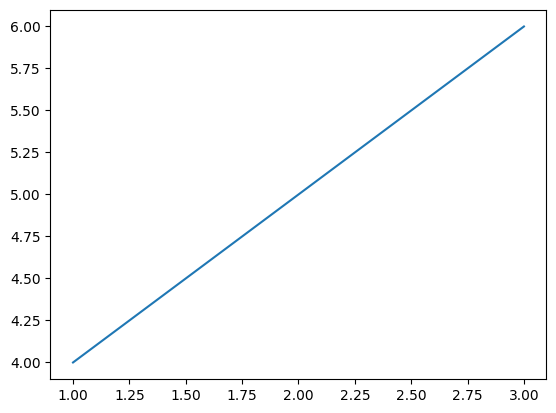

In [3]:
import matplotlib.pyplot as plt

# 간단한 그래프 그리기
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

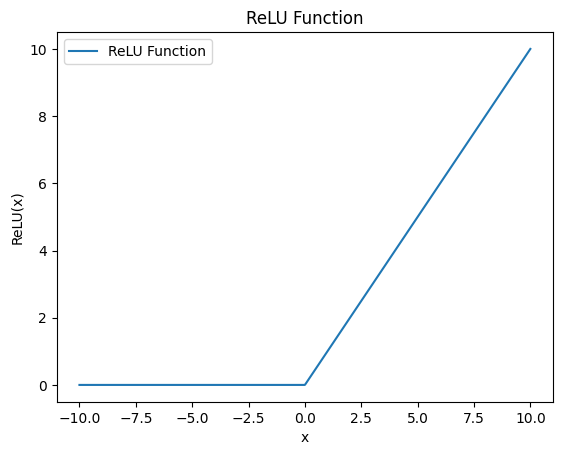

In [4]:
# ReLU 함수 그래프
import torch
import matplotlib.pyplot as plt
import numpy as np

# x 값을 -10부터 10까지 0.1 간격으로 생성
x = torch.linspace(-10, 10, 1000)

# ReLU 함수 적용
y = torch.relu(x)

# 그래프 출력
plt.plot(x.numpy(), y.numpy(), label='ReLU Function')
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.legend()
plt.show()

> ### PyTorch에서 ReLU 함수 사용 예제

In [5]:
import torch
import torch.nn as nn

# 예제: 2D 텐서에 ReLU 함수 적용

# 임의의 2D 텐서 (배치 크기 2, 특성 3)
input_tensor = torch.tensor([[-1.0, 2.0, -3.0], [4.0, -5.0, 6.0]])

# ReLU 활성화 함수 객체 생성
relu = nn.ReLU()

# ReLU 함수 적용
output_tensor = relu(input_tensor)

print("입력 텐서:")
print(input_tensor)

print("\nReLU 활성화 함수 적용 후 출력 텐서:")
print(output_tensor)

입력 텐서:
tensor([[-1.,  2., -3.],
        [ 4., -5.,  6.]])

ReLU 활성화 함수 적용 후 출력 텐서:
tensor([[0., 2., 0.],
        [4., 0., 6.]])


- 위 예제에서 input_tensor는 두 개의 샘플(배치 크기 2)과 세 개의 특성(각각의 샘플에 대해 3개의 값)을 갖는 2D 텐서입니다.

- nn.ReLU()는 PyTorch에서 제공하는 ReLU 활성화 함수로, 이 객체를 input_tensor에 적용하면 음수 값은 0으로 변하고, 양수 값은 그대로 출력됩니다.

- ReLU 함수는 기본적으로 각각의 값에 대해 독립적으로 적용됩니다.

## 6.2 Sigmoid 활성화 함수

### 6.2.1 Sigmoid 함수 특징

- 출력값이 0과 1 사이로 압축됩니다. **이진 분류** 문제의 출력층에서 사용됩니다.
- 출력이 0과 1 사이로 제한되기 때문에 확률적 해석이 가능합니다.

### 6.2.2 Sigmoid 함수 식 

- 시그모이드 함수에 x값을 입력하면 0 ~ 1사이의 값이 출력됩니다.

<img src="./image/6.2_sigmoid.png" width="500">
<figcaption>그림 6.2 시그모이드 함수 식</figcaption>

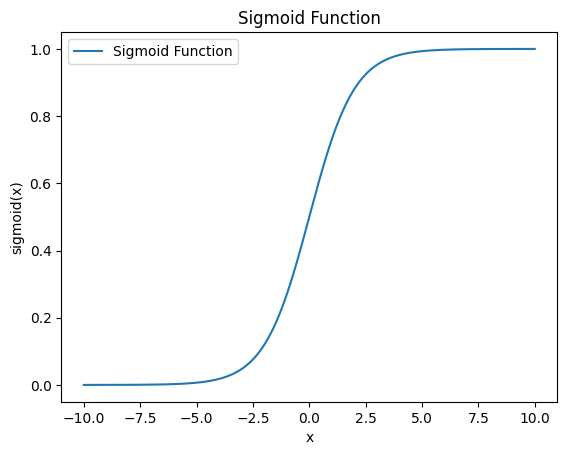

In [6]:
# 시그모이드 그래프
import torch
import matplotlib.pyplot as plt
import numpy as np

# x 값을 -10부터 10까지 0.1 간격으로 생성
x = torch.linspace(-10, 10, 1000)

# Sigmoid 함수 적용
y = torch.sigmoid(x)

# 그래프 출력
plt.plot(x.numpy(), y.numpy(), label='Sigmoid Function')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.legend()
plt.show()

## `ReLU와 Sigmoid 함수 적용 예시` 

In [7]:
# ReLU 함수
import torch
import torch.nn as nn

# 입력 데이터 생성 (-1, 0, 1 값을 가지는 텐서)
x = torch.tensor([-1.0, 0.0, 1.0])

# ReLU 함수 생성
relu = nn.ReLU()

# ReLU 함수 적용
output = relu(x)

# 결과 출력
print("입력 텐서:", x)
print("ReLU 함수 적용 후 결과:", output)

입력 텐서: tensor([-1.,  0.,  1.])
ReLU 함수 적용 후 결과: tensor([0., 0., 1.])


- ReLU 함수는 입력 값이 0보다 크면 그대로 출력하고, 0 이하일 경우 0으로 출력합니다.
- ReLU 결과를 보면 입력 데이터 -1은 0으로 변환하고 0은 그대로 0으로, 1은 그대로 1로 출력된 것을 확인할 수 있습니다.


In [8]:
# 시그모이드 함수
import torch
import torch.nn as nn

# 입력 데이터 생성 (-1, 0, 1 값을 가지는 텐서)
x = torch.tensor([-1.0, 0.0, 1.0])

# Sigmoid 함수 적용
output = torch.sigmoid(x)

# 결과 출력
print("입력 텐서:", x)
print("Sigmoid 함수 적용 후 결과:", output)

입력 텐서: tensor([-1.,  0.,  1.])
Sigmoid 함수 적용 후 결과: tensor([0.2689, 0.5000, 0.7311])


- Sigmoid 함수 결과를 보면 입력이 -1일 때는 출력이 0.2689로, 0일 때는 0.5, 1일 때는 0.7311로 변환되는 것을 알 수 있습니다.

## 6.3 Tanh 활성화 함수

- Tanh(Hyperbolic Tangent)는 입력값을 -1과 1 사이로 매핑합니다. Sigmoid보다 더 넓은 범위의 출력을 제공합니다.

In [9]:
import torch
import torch.nn as nn
x = torch.tensor([-1.0, 0.0, 1.0])

tanh = nn.Tanh()
output = tanh(x)

print("입력 텐서:", x)
print("tanh 함수 적용 후 결과:", output)

입력 텐서: tensor([-1.,  0.,  1.])
tanh 함수 적용 후 결과: tensor([-0.7616,  0.0000,  0.7616])


## 6.4 Softmax 활성화 함수

- 소프트맥스 함수는 주로 다중 클래스 분류 문제에서 마지막 출력 층에 사용됩니다. 이 함수는 각 클래스에 대한 확률을 출력하며, 출력값의 총합이 1이 되도록 만듭니다.
- 출력의 정규화에서 소프트맥스 함수는 각 클래스의 예측 값을 0과 1 사이로 정규화하여 확률로 변환하고, 이 확률들의 합이 1이 됩니다. 이는 다중 클래스 분류 문제에서 예측 결과를 해석하는 데 유용합니다.
- 다중 클래스 분류 문제에서 **크로스 엔트로피 손실 함수(CrossEntropyLoss)** 는 실제 정답과 예측 확률 간의 차이를 계산합니다. 이때 소프트맥스를 사용하여 예측 값을 확률로 변환한 후, 손실을 계산합니다. PyTorch에서는 nn.CrossEntropyLoss()가 소프트맥스를 내부적으로 적용하여 로짓 값만을 입력받도록 설계되어 있습니다.

In [10]:
import torch
import torch.nn as nn

# Softmax 활성화 함수 예제
softmax = nn.Softmax(dim=0) # dim=0: 0번째 차원(클래스 차원)에 대해 소프트맥스를 적용

# 입력 텐서 생성 (예시)
logits = torch.tensor([2.0, 1.0, 0.1])

# Softmax 함수 적용
output = softmax(logits)
print("Softmax Output:", output)

Softmax Output: tensor([0.6590, 0.2424, 0.0986])


- logits는 모델이 예측한 로짓 값으로, 아직 확률 값이 아닙니다. 소프트맥스를 통과한 후에는 각 클래스에 대한 확률 값이 출력됩니다.
- nn.Softmax(dim=0)는 logits의 각 원소에 대해 소프트맥스를 적용합니다. dim=0은 각 클래스 차원에 대해 연산을 수행한다는 뜻입니다.
- logits 값은 모델의 마지막 출력이고, 이를 소프트맥스를 통해 확률 분포로 변환합니다.

**nn.ReLU(), nn.Sigmoid(), nn.Tanh(), nn.LeakyReLU(), nn.Softmax()** 등은 파이토치에서 제공하는 활성화 함수들입니다.
- 각 함수는 텐서 형태의 입력을 받아서, 해당 활성화 함수에 맞는 변환을 수행합니다.
- torch.tensor([...])로 텐서를 정의하고 이를 활성화 함수에 통과시킵니다.
- Softmax의 경우, dim=0을 설정하여 첫 번째 차원에 대해 확률 값을 계산합니다.